In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick


In [2]:
n_algo = 15
n_episode = 10
n_step = 100

data_all = np.zeros((15, n_episode, n_step))
file_per_algo = [[f'data/_res_loss_all_algo-{algo}_{i}.pt' for i in range(n_episode)] for algo in range(n_algo)]

for i, algo in enumerate(file_per_algo):
    for j, file in enumerate(algo):
        try:
            a =  torch.load(file).detach().numpy()
            data_all[i, j] = a
        except:
            pass

In [3]:
legend = ['Momentum', 'Momentum', 'Momentum', 'Adagrad','Adagrad','Adagrad','RMSprop','RMSprop','RMSprop','Adam','Adam','Adam',
       'RAdam', 'RAdam', 'RAdam']

lr = ['1E2', '1E1', '1E0', '1E1', '1E0', '1E-1', '1E1', '1E0', '1E-1','1E1', '1E0', '1E-1','1E1', '1E0', '1E-1']


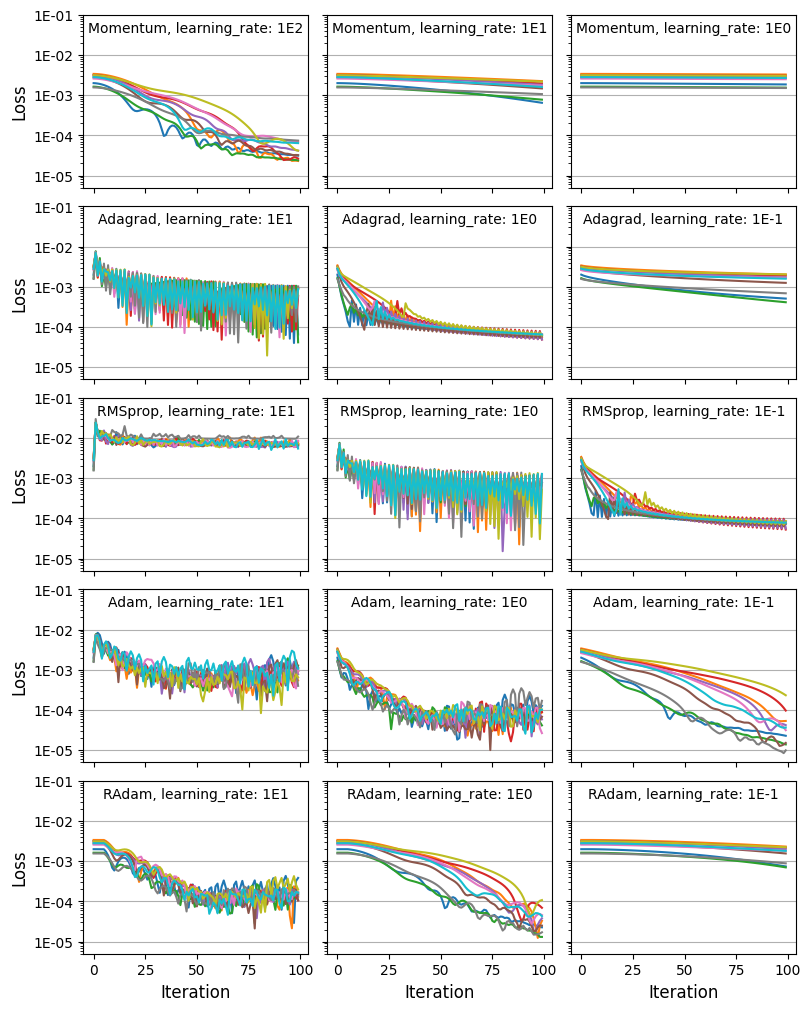

In [4]:
fig, axs = plt.subplots(5,3, figsize=(8,10), layout='constrained', sharex=True, sharey=True)

# for i, leg_name in enumerate(leg):
    
    
for i, ax in enumerate(axs.flat):
    # if i == len(data_all): break
    data0 = data_all[i].T
    x = range(data0.shape[-2])
    ax.plot(x, data0)
    ax.set_yscale('log')
    ax.set_ylim((5E-6, 1E-1))
    ax.text(.5,.9, f'{legend[i]}, learning_rate: {lr[i]}', horizontalalignment='center', transform=ax.transAxes)
    ax.yaxis.grid()


axs[4][0].set_xlabel('Iteration', fontsize=12)
axs[4][1].set_xlabel('Iteration', fontsize=12)
axs[4][2].set_xlabel('Iteration', fontsize=12)
axs[0][0].set_ylabel('Loss', fontsize=12)
axs[1][0].set_ylabel('Loss', fontsize=12)
axs[2][0].set_ylabel('Loss', fontsize=12)
axs[3][0].set_ylabel('Loss', fontsize=12)
axs[4][0].set_ylabel('Loss', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.E'))
plt.show()